# Análise Exploratória de Dados
Matheus Miranda Brandão

## Imports

In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_theme(style="ticks", rc={"axes.spines.right": False, "axes.spines.top": False})
from sklearn.preprocessing import LabelEncoder

In [254]:
df = pd.read_csv('../../datasets/raw/training_data.csv', sep=';')
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,25,Travel_Rarely,685,Research & Development,1,3,Life Sciences,1,350,1,...,80,2,5,3,3,4,2,1,2,0
1,44,Travel_Rarely,1376,Human Resources,1,2,Medical,1,1098,2,...,80,1,24,1,3,20,6,3,6,1
2,27,Travel_Rarely,135,Research & Development,17,4,Life Sciences,1,1405,4,...,80,0,8,2,3,8,2,7,7,1
3,40,Travel_Frequently,580,Sales,5,4,Life Sciences,1,729,4,...,80,1,20,2,3,18,13,1,12,0
4,24,Travel_Rarely,477,Research & Development,24,3,Medical,1,1173,4,...,80,0,6,2,3,4,3,1,2,0


In [255]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1176 non-null   int64 
 1   BusinessTravel            1176 non-null   object
 2   DailyRate                 1176 non-null   int64 
 3   Department                1176 non-null   object
 4   DistanceFromHome          1176 non-null   int64 
 5   Education                 1176 non-null   int64 
 6   EducationField            1176 non-null   object
 7   EmployeeCount             1176 non-null   int64 
 8   EmployeeNumber            1176 non-null   int64 
 9   EnvironmentSatisfaction   1176 non-null   int64 
 10  Gender                    1176 non-null   object
 11  HourlyRate                1176 non-null   int64 
 12  JobInvolvement            1176 non-null   int64 
 13  JobLevel                  1176 non-null   int64 
 14  JobRole                 

In [256]:
df.describe(exclude='number')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1176,1176,1176,1176,1176,1176,1176,1176
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,828,764,472,704,263,535,1176,853


In [257]:
df.drop(columns=['Over18'], inplace=True)

In [258]:
df.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
Age,1176.0,36.964286,9.148817,18.0,30.00,36.0,43.00,60.0
DailyRate,1176.0,801.496599,400.618020,102.0,468.25,801.5,1157.25,1499.0
DistanceFromHome,1176.0,9.097789,8.002540,1.0,2.00,7.0,14.00,29.0
Education,1176.0,2.917517,1.022720,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1176.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1176.0,1038.992347,599.144223,1.0,500.75,1040.5,1574.50,2065.0
EnvironmentSatisfaction,1176.0,2.728741,1.096404,1.0,2.00,3.0,4.00,4.0
HourlyRate,1176.0,65.398810,20.289856,30.0,48.00,65.0,83.00,100.0
JobInvolvement,1176.0,2.725340,0.708781,1.0,2.00,3.0,3.00,4.0
JobLevel,1176.0,2.071429,1.118510,1.0,1.00,2.0,3.00,5.0


In [259]:
df.drop(columns=['EmployeeCount', 'StandardHours'], inplace=True)

In [260]:
def camel_to_snake(col: str) -> str:
    col = ''.join([item if not item.isupper() else '_' + item for item in col])
    return col[1:].lower()

for item in df.columns:
    df.rename(columns={item: camel_to_snake(item)}, inplace=True)
del camel_to_snake
    
df.business_travel.replace(r'_', ' ', regex=True, inplace=True)

In [261]:
df.head()

,age,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,...,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,attrition
0,25,Travel Rarely,685,Research & Development,1,3,Life Sciences,350,1,Female,...,4,2,5,3,3,4,2,1,2,0
1,44,Travel Rarely,1376,Human Resources,1,2,Medical,1098,2,Male,...,4,1,24,1,3,20,6,3,6,1
2,27,Travel Rarely,135,Research & Development,17,4,Life Sciences,1405,4,Female,...,4,0,8,2,3,8,2,7,7,1
3,40,Travel Frequently,580,Sales,5,4,Life Sciences,729,4,Male,...,3,1,20,2,3,18,13,1,12,0
4,24,Travel Rarely,477,Research & Development,24,3,Medical,1173,4,Male,...,4,0,6,2,3,4,3,1,2,0


In [262]:
for item in df.select_dtypes('object').columns:
    df[item] = df[item].astype('category').cat.codes

In [263]:
for item in df.select_dtypes('number').columns:
    ok = (df[item] == df[item].astype('int8')).unique()
    if len(ok) == 1:
        df[item] = df[item].astype('int8')
    else:
        df[item] = df[item].astype('int16')

In [264]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   age                         1176 non-null   int8 
 1   business_travel             1176 non-null   int8 
 2   daily_rate                  1176 non-null   int16
 3   department                  1176 non-null   int8 
 4   distance_from_home          1176 non-null   int8 
 5   education                   1176 non-null   int8 
 6   education_field             1176 non-null   int8 
 7   employee_number             1176 non-null   int16
 8   environment_satisfaction    1176 non-null   int8 
 9   gender                      1176 non-null   int8 
 10  hourly_rate                 1176 non-null   int8 
 11  job_involvement             1176 non-null   int8 
 12  job_level                   1176 non-null   int8 
 13  job_role                    1176 non-null   int8 
 14  job_sati

In [266]:
df.to_pickle('../../datasets/processed/data.pkl')

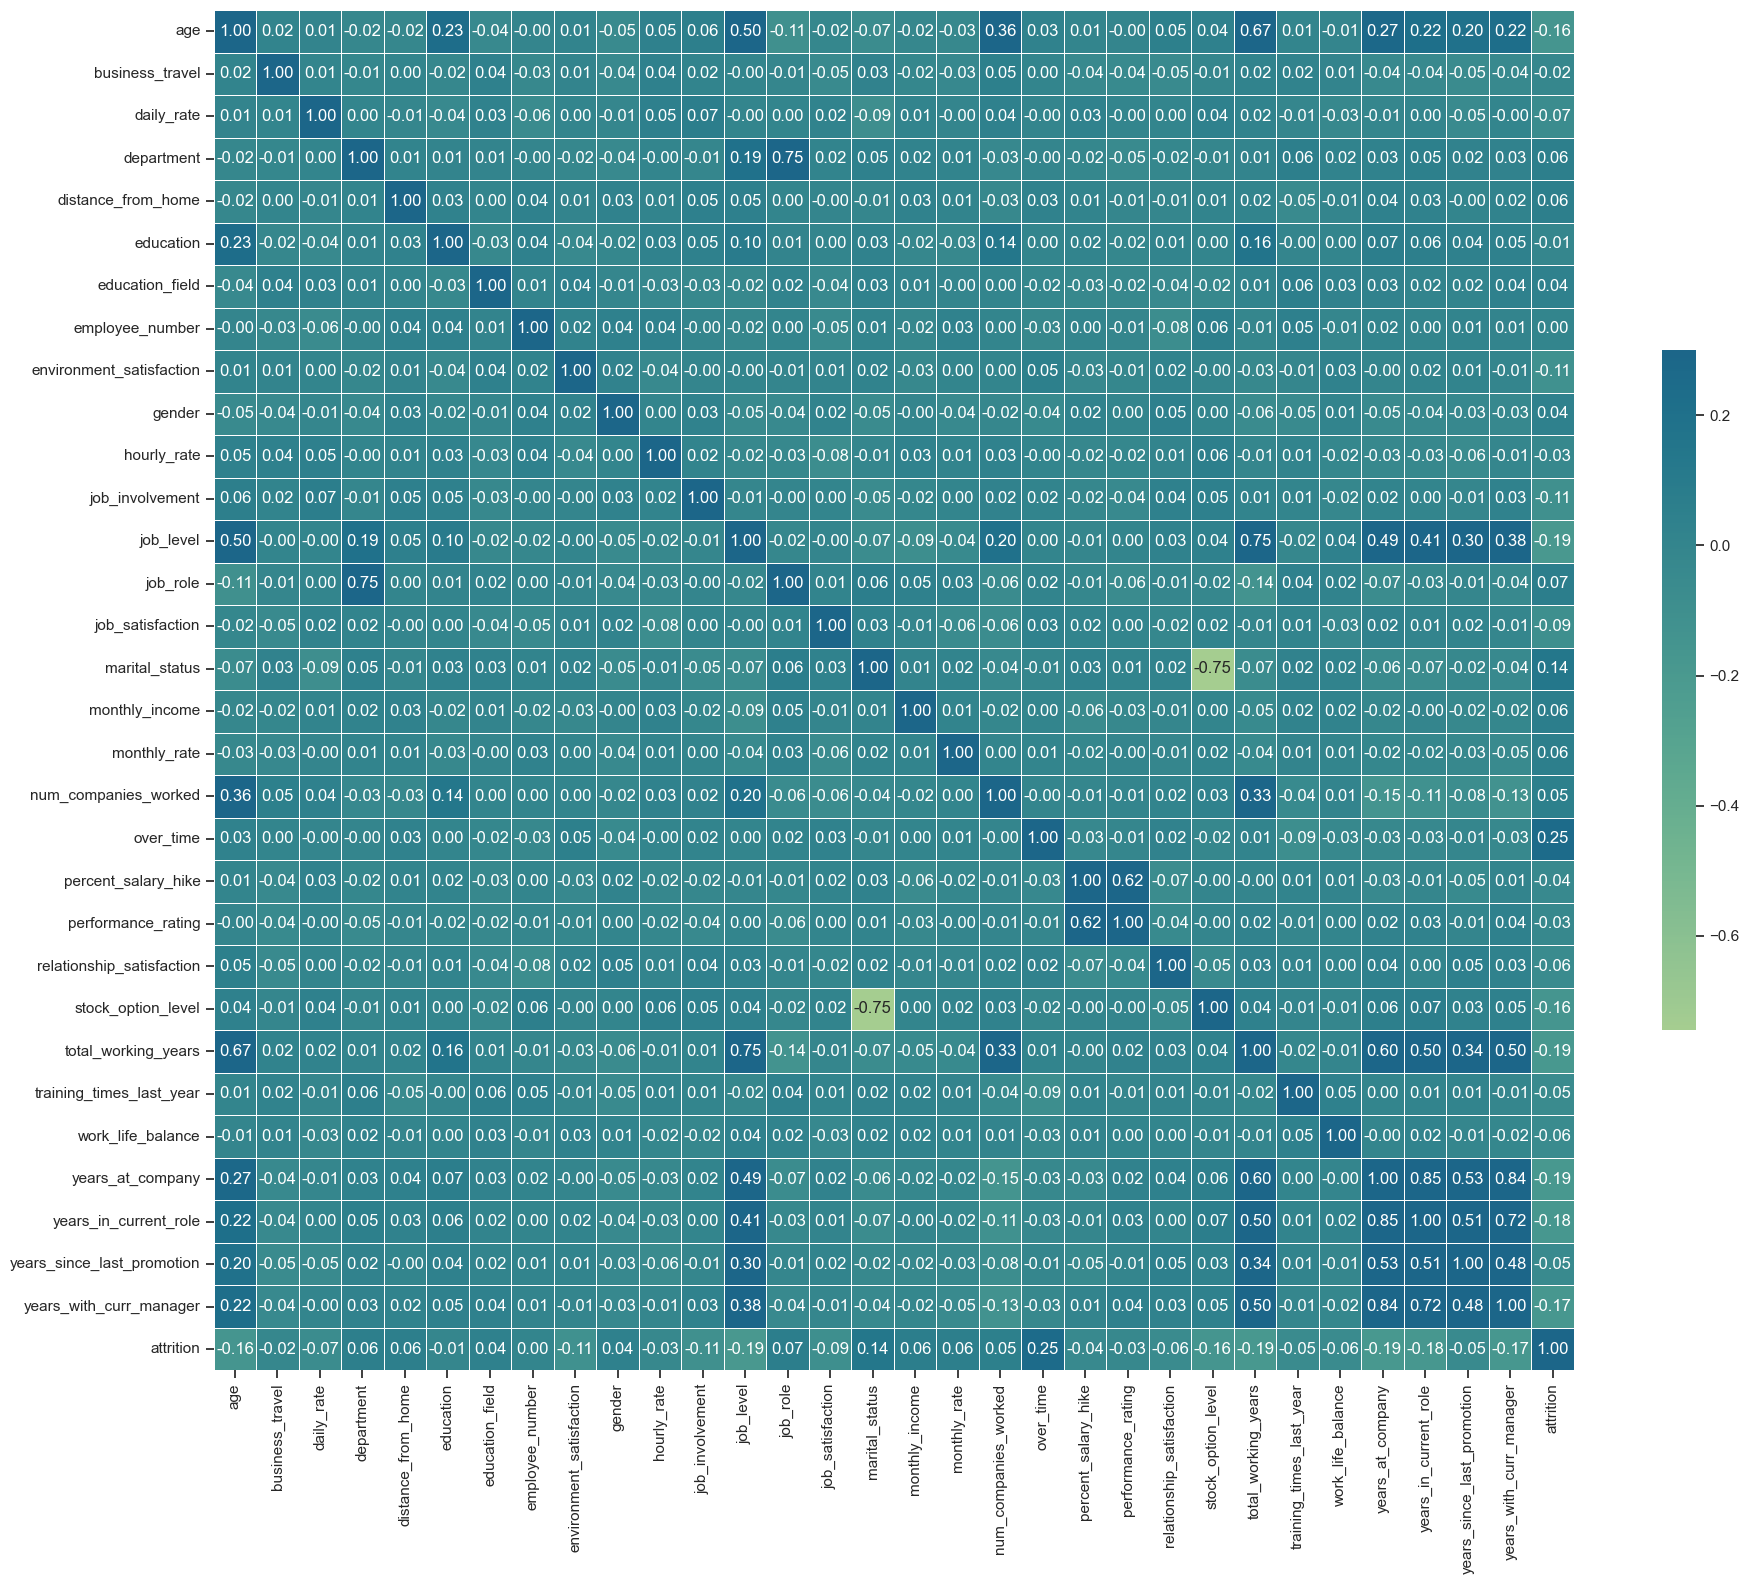

In [248]:
def plot_heatmap(corr: pd.DataFrame, figsize: tuple = (20, 16)) -> None:
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(1, 1, 1)
    sns.heatmap(corr, cmap="crest", vmax=.3, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', ax=ax)
    fig.tight_layout()

corr = df.corr(numeric_only=True, method='pearson')
plot_heatmap(corr, figsize=(20, 16))

plt.show()

In [ ]:
corr_to_analysis = []

for item in corr.columns:
    strong_corr = zip(corr[item].abs().sort_values(ascending=False)[1:4].index, corr[item].abs().sort_values(ascending=False)[1:4].values)
    for index, value in strong_corr:
        if value >= 0.75 and ((item, index, value) not in corr_to_analysis or (index, item, value) not in corr_to_analysis):
            corr_to_analysis.append((item, index, value))

In [246]:
corr_to_analysis

[('department', 'job_role', 0.7505075025810999),
 ('job_level', 'total_working_years', 0.7502766976204281),
 ('job_role', 'department', 0.7505075025810999),
 ('total_working_years', 'job_level', 0.7502766976204281),
 ('years_at_company', 'years_in_current_role', 0.854023910720847),
 ('years_at_company', 'years_with_curr_manager', 0.8428163073828217),
 ('years_in_current_role', 'years_at_company', 0.854023910720847),
 ('years_with_curr_manager', 'years_at_company', 0.8428163073828217)]

In [252]:
corr.attrition.abs().sort_values(ascending=True)[:4]

employee_number    0.004778
education          0.013795
business_travel    0.021100
hourly_rate        0.026763
Name: attrition, dtype: float64